#  FUEL AMOUNT PREDICTION USING LINEAR REGRESSION

#### IMPORT NEEDED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge

In [2]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [3]:
import matplotlib.pyplot as plt

In [6]:
#step2 #read the data
data=pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
#step3
np.random.seed(42)
data['Distance'] = np.random.randint(50, 500, size=len(data))

In [8]:
# Step 4: Calculate the 'Fuel Amount' (in liters)
data['Fuel_Amount'] = (data['Distance'] * data['FUELCONSUMPTION_COMB']) / 100


In [9]:
# Step 5: Detect and cap outliers (using 1.5*IQR method for simplicity)
for col in ['Distance', 'FUELCONSUMPTION_COMB']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)


In [10]:
# Step 6: Select relevant columns for modeling
features = data[['Distance', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
target = data['Fuel_Amount']

In [11]:
# Step 7: Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [12]:
# Step 8: Add polynomial features for capturing non-linearity
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_poly = poly.fit_transform(features_scaled)


In [13]:
# Step 9: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_poly, target, test_size=0.2, random_state=42)

In [14]:

# Step 10: Build and train a Ridge Regression model (to prevent overfitting)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [15]:
# Step 11: Evaluate the model using Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
cv_mean = np.mean(cv_scores)


In [16]:
# Step 12: Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [17]:
# Step 13: Print metrics and cross-validation score
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Cross-Validated R² Score: {cv_mean}")


Mean Squared Error (MSE): 3.5966381087192816
R² Score: 0.9899510330688047
Cross-Validated R² Score: 0.995399557332051


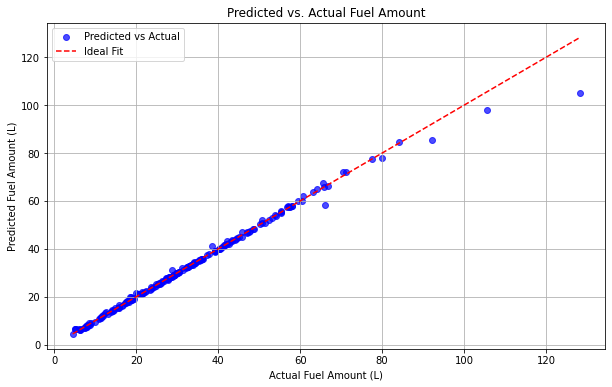

In [18]:
# Step 14: Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Predicted vs. Actual Fuel Amount")
plt.xlabel("Actual Fuel Amount (L)")
plt.ylabel("Predicted Fuel Amount (L)")
plt.legend()
plt.grid()
plt.show()
